In [1]:
from lang_main import io
from lang_main.analysis.graphs import rescale_edge_weights

from pathlib import Path
import pickle
import base64

import numpy as np

2024-07-03 14:30:30 +0000 | io:INFO | Loaded TOML config file successfully.


A:\Arbeitsaufgaben\lang-main\.venv\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
A:\Arbeitsaufgaben\lang-main\.venv\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
A:\Arbeitsaufgaben\lang-main\.venv\Lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
A:\Arbeitsaufgaben\lang-main\.venv\Lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytre

In [2]:
res_path = Path(r'A:\Arbeitsaufgaben\lang-main\scripts\results\test_20240619')
assert res_path.exists()

In [3]:
#obj = 'TK-GRAPH_POSTPROCESSING.pkl'
obj = 'TK-GRAPH_ANALYSIS.pkl'
load_pth = res_path / obj
assert load_pth.exists()

In [4]:
ret = io.load_pickle(load_pth)

2024-07-03 14:30:35 +0000 | io:INFO | Loaded file successfully.


In [5]:
tkg = ret[0]

In [6]:
tkg

TokenGraph(name: TokenGraph, number of nodes: 143, number of edges: 163)

In [7]:
import networkx as nx
from alph import alph, layout
import altair as alt

layout_fn=lambda g: nx.spring_layout(
        g,
        weight="weight",
        k=20,
        iterations=5000,
        seed=42
    ),
layout_fn=lambda g: layout.force_atlas_sknet(
        g,
        n_iter=1000,
        gravity_factor=0.01,
        repulsive_factor=0.1,
        init_seed=42,
    ),
layout_fn=lambda g: nx.nx_agraph.pygraphviz_layout(
        g,
        prog="fdp",
        args='-GK=5'
    ),
layout_fn=lambda g: nx.nx_agraph.pygraphviz_layout(
        g,
        prog="sfdp",
        args='-GK=5 -Gbeautify=true -Goverlap=true'
    ),
layout_fn=lambda g: nx.nx_agraph.pygraphviz_layout(
        g,
        prog="neato",
        args='-Goverlap=false'
    ),

In [8]:
alph_params = dict(
    weight_attr="weight",
    layout_fn=lambda g: nx.nx_agraph.pygraphviz_layout(
        g,
        prog="sfdp",
        args='-GK=5 -Gbeautify=true -Goverlap=true'
    ),
    node_args=dict(
        size=alt.Size(
            "degree_centrality",
            scale=alt.Scale(domain=[0,1], range=[12**2, 40**2]),
            legend=None
        ),
        #fill=alt.Color(
        #    "degree_centrality",
        #    scale=alt.Scale(domain=companies, range=palette),
        #),
        stroke="#333",
        strokeWidth=alt.Size(
            "degree_centrality",
            scale=alt.Scale(domain=[0,1], range=[2, 5]),
            legend=None
        ),
        tooltip_attrs=["id"],
        label_attr="id",
    ),
    edge_args=dict(
        color="#000",
    ),
    width=800,
    height=600,
)

In [104]:
tkg = Gtest.copy()

In [105]:
nx.set_node_attributes(tkg, {
    n: {
        "id": n,
    } for n in tkg.nodes
})

In [106]:
nx.set_node_attributes(tkg, nx.degree_centrality(tkg), "degree_centrality")

In [107]:
alph(tkg, **alph_params).configure_view(strokeWidth=0)

TypeError: decoding to str: need a bytes-like object, NoneType found

In [65]:
tkg.nodes['Wartungstätigkeit']

{'id': 'Wartungstätigkeit', 'degree_centrality': 0.04225352112676056}

**additional info:**
- overlap removal for sfdp Graphviz algorithm not available because of missing triangulation library (only available on Linux)

In [8]:
obj = 'TK-GRAPH_POSTPROCESSING.pkl'
# obj = 'TK-GRAPH_ANALYSIS.pkl'
load_pth = res_path / obj
assert load_pth.exists()

In [9]:
ret = io.load_pickle(load_pth)

2024-07-03 14:30:35 +0000 | io:INFO | Loaded file successfully.


In [10]:
tkg = ret[0]

In [11]:
tkg

TokenGraph(name: TokenGraph, number of nodes: 6028, number of edges: 17950)

In [12]:
Gtest = rescale_edge_weights(tkg)

break_early = False
i = 0
for idx, (node1, node2) in enumerate(list(Gtest.edges)):
    if break_early and i == 10:
        break
    Gtest[node1][node2]['weight'] = adjusted_weights[idx]
    
    i += 1

In [13]:
break_early = True
i = 0
for n1, n2, w in Gtest.edges.data('weight'):
    if break_early and i == 10:
        break
    print(n1, n2, w)

    i += 1

Wartungstätigkeit Vorgabe 1.0
Wartungstätigkeit Maschinenhersteller 1.0
Wartungstätigkeit Maschinenbediener 0.8215
Wartungstätigkeit Laserabteilung 0.8215
Wartungstätigkeit Arbeitsplan 0.8219
Wartungstätigkeit abarbeiten 0.8215
Wartungstätigkeit Webmaschinenkontrollliste 0.2534
Wartungstätigkeit sehen 0.2534
Vorgabe Maschinenhersteller 1.0
Vorgabe Wartungsplan 0.9181


In [14]:
Gtest.to_undirected(inplace=True)

2024-07-03 14:30:39 +0000 | graphs:INFO | Successfully converted graph to one with undirected edges.
2024-07-03 14:30:39 +0000 | graphs:INFO | Graph properties: 6028 Nodes, 17554 Edges
2024-07-03 14:30:39 +0000 | graphs:INFO | Node memory: 373.36 KB
2024-07-03 14:30:39 +0000 | graphs:INFO | Edge memory: 959.98 KB
2024-07-03 14:30:39 +0000 | graphs:INFO | Total memory: 1333.34 KB


In [15]:
break_early = True
i = 0
for n1, n2, w in Gtest.undirected.edges.data('weight'):
    if break_early and i == 10:
        break
    print(n1, n2, w)

    i += 1

Wartungstätigkeit Vorgabe 1.0
Wartungstätigkeit Maschinenhersteller 1.0
Wartungstätigkeit sehen 0.2533999979496002
Wartungstätigkeit Maschinenbediener 0.8215000033378601
Wartungstätigkeit Laserabteilung 0.8215000033378601
Wartungstätigkeit Arbeitsplan 0.8219000101089478
Wartungstätigkeit abarbeiten 0.8215000033378601
Wartungstätigkeit Webmaschinenkontrollliste 0.2533999979496002
Vorgabe Maschinenhersteller 1.0
Vorgabe Wartungsplan 0.9180999994277954


In [16]:
Gtest.metadata_undirected

{'num_nodes': 6028,
 'num_edges': 17554,
 'min_edge_weight': 0.09520000219345093,
 'max_edge_weight': 1.7527999877929688,
 'node_memory': 382321,
 'edge_memory': 983024,
 'total_memory': 1365345}

In [17]:
Gtest.metadata_directed

{'num_nodes': 6028,
 'num_edges': 17950,
 'min_edge_weight': 0.0952,
 'max_edge_weight': 1.0,
 'node_memory': 382321,
 'edge_memory': 1005200,
 'total_memory': 1387521}

In [21]:
c_comps = nx.connected_components(Gtest.undirected)

In [22]:
for comp in c_comps:
    print(len(comp))

5714
2
2
2
3
4
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
3
2
2
2
2
3
3
4
2
2
2
2
2
2
2
2
3
2
2
2
2
3
2
3
2
2
2
3
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
4
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
3
2
2
3
2
2
2
2
2
2
3
2
2
2
4
2
2
2
3
2
2
2
2
2
2
2
3
2
2
4
2
3
2
2
2
3
3
2
2
2
2
2
2
2
2
3
2
2
2


---

# Py4Cytoscape

In [10]:
import py4cytoscape as p4c
dir(py4)
py4.cytoscape_ping()
py4.cytoscape_version_info()

You are connected to Cytoscape!


{'apiVersion': 'v1',
 'cytoscapeVersion': '3.10.2',
 'automationAPIVersion': '1.9.0',
 'py4cytoscapeVersion': '1.9.0'}

In [20]:
import pandas as pd
nodes = pd.DataFrame(data={'id': ["node 0","node 1","node 2","node 3"], 'group': ["A","A","B","B"], 'score': [20,10,15,5]})
edges = pd.DataFrame(data={'source': ["node 0","node 0","node 0","node 2"], 'target': ["node 1","node 2","node 3","node 3"], 'interaction': ["inhibits","interacts","activates","interacts"], 'weight': [5.1,3.0,5.2,9.9]})

In [21]:
nodes

id group  score
0  node 0     A     20
1  node 1     A     10
2  node 2     B     15
3  node 3     B      5

In [22]:
edges

source  target interaction  weight
0  node 0  node 1    inhibits     5.1
1  node 0  node 2   interacts     3.0
2  node 0  node 3   activates     5.2
3  node 2  node 3   interacts     9.9

In [23]:
p4c.create_network_from_data_frames(nodes, edges, title="my first network", collection="DataFrame Example")

Applying default style...
Applying preferred layout


344

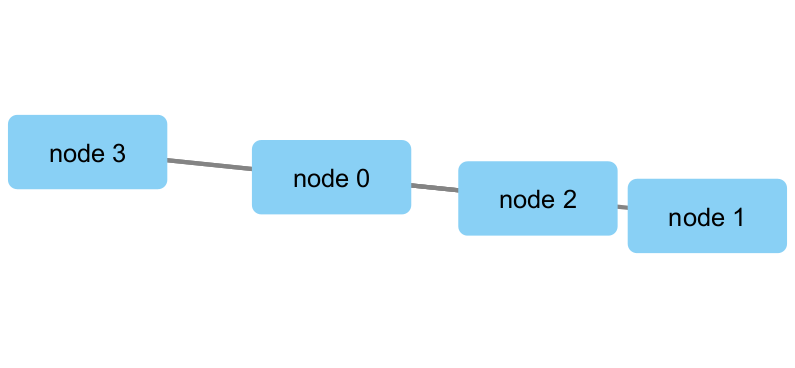

In [24]:
p4c.notebook_export_show_image()

In [25]:
p4c.set_visual_style('Marquee')

{'message': 'Visual Style applied.'}

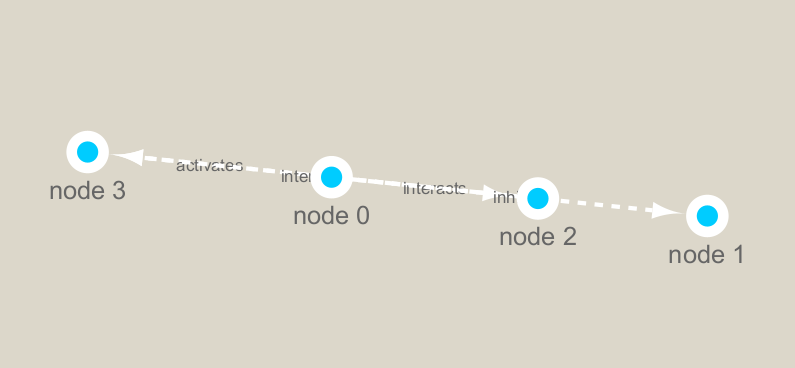

In [26]:
p4c.notebook_export_show_image()

In [27]:
style_name = "myStyle"
defaults = {'NODE_SHAPE': "diamond", 'NODE_SIZE': 30, 'EDGE_TRANSPARENCY': 120, 'NODE_LABEL_POSITION': "W,E,c,0.00,0.00"}
nodeLabels = p4c.map_visual_property('node label', 'id', 'p') #'p' means 'passthrough' mapping
edgeWidth = p4c.map_visual_property('edge width', 'weight', 'p') #'p' means 'passthrough' mapping
p4c.create_visual_style(style_name, defaults, [nodeLabels, edgeWidth])
p4c.set_visual_style(style_name)

{'message': 'Visual Style applied.'}

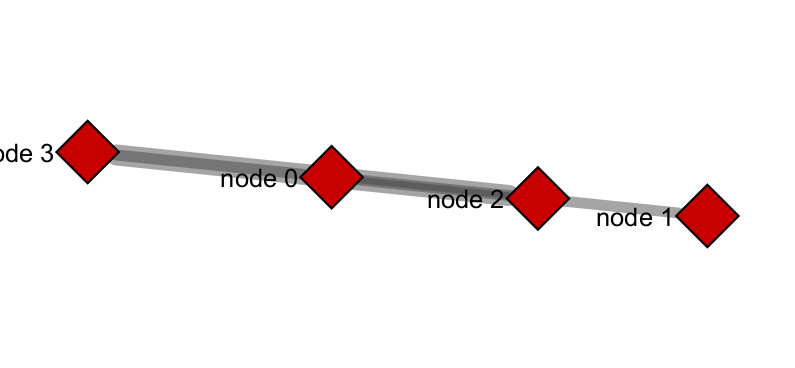

In [28]:
p4c.notebook_export_show_image()